In [2]:
import os
os.chdir('../../')
!ls

food_trade


python(40055) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


In [19]:
import geopandas as gpd
import pandas as pd
import numpy as np
from scipy import stats
from food_trade.demand_supply.balance_trade import get_area_codes, get_prod_matrix, get_trade_matrix, re_export_algo
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_country_log_false_thresh_1 = pd.read_parquet('../../data/combined_features/using_supply_mat/df_country_log_false_thresh_1.parquet.gzip')
df_country_log_true_thresh_1 = pd.read_parquet('../../data/combined_features/using_supply_mat/df_country_log_true_thresh_1.parquet.gzip')

In [66]:
df = df_country_log_false_thresh_1
trade = df.groupby(['to_iso3']).sum()[['trade']].reset_index().rename(columns={'trade': 'imports', 'to_iso3': 'iso3'}).merge(
    df.groupby(['from_iso3']).sum()[['trade']].reset_index().rename(columns={'trade': 'exports', 'from_iso3': 'iso3'}), how='outer')
trade = trade.fillna(0)

In [67]:
trade['flows'] = trade['imports'] + trade['exports']

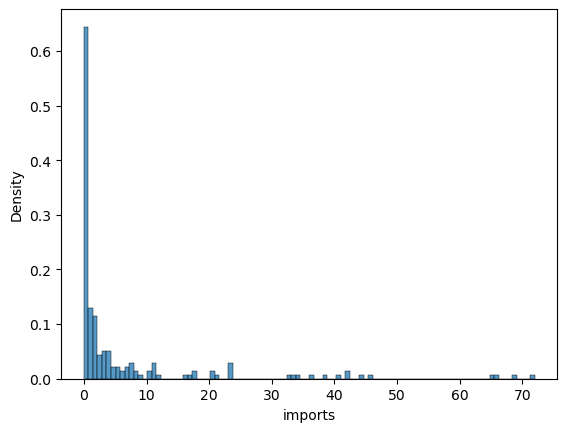

In [68]:
sns.histplot(x=trade['imports']/1e6, stat="density", bins=100)
plt.show()

<Axes: ylabel='Density'>

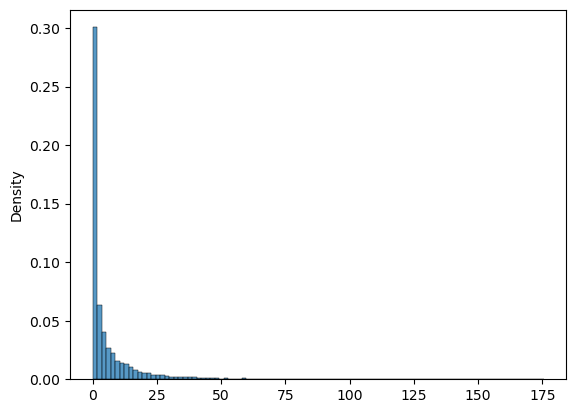

In [10]:
sample = stats.gamma.rvs(a=0.3, loc=0, scale=20, size=10000)
sns.histplot(x=sample, stat="density", bins=100)

In [11]:
stats.kstest(trade['imports']/1e6, 'gamma', args=(0.3, 0, 20))

KstestResult(statistic=0.08986165756350928, pvalue=0.08191060614659873, statistic_location=1.976966945521092, statistic_sign=1)

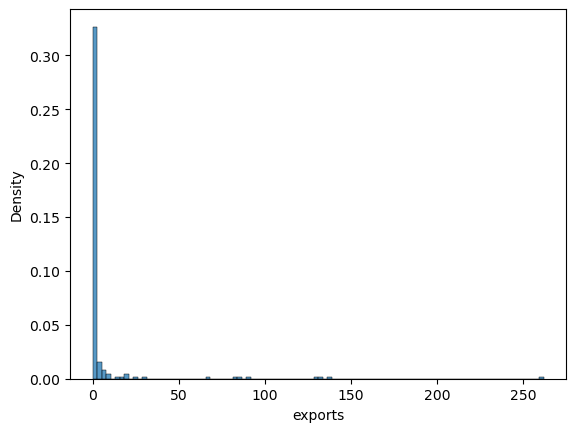

In [39]:
sns.histplot(x=trade['exports']/1e6, stat="density", bins=100)
plt.show()

<Axes: ylabel='Density'>

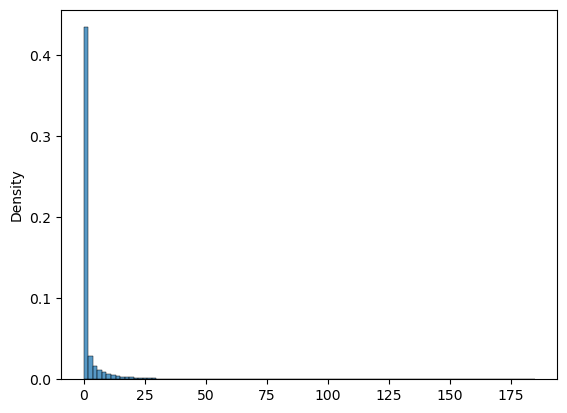

In [13]:
sample = stats.gamma.rvs(a=0.1, loc=0, scale=25, size=100000)
sns.histplot(x=sample, stat="density", bins=100)

In [14]:
stats.kstest(trade['exports']/1e6, 'gamma', args=(0.1, 0, 25))

KstestResult(statistic=0.1958762886597938, pvalue=5.367693916789904e-07, statistic_location=0.0, statistic_sign=1)

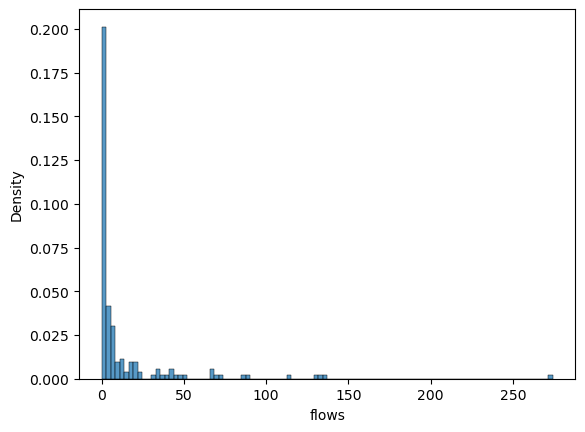

In [41]:
sns.histplot(x=trade['flows']/1e6, stat="density", bins=100)
plt.show()

<Axes: ylabel='Density'>

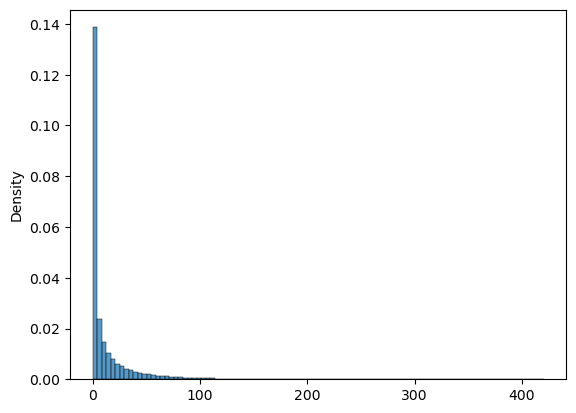

In [16]:
sample = stats.gamma.rvs(a=0.25, loc=0, scale=50, size=100000)
sns.histplot(x=sample, stat="density", bins=100)

In [17]:
stats.kstest(trade['flows']/1e6, 'gamma', args=(0.25, 0, 50))

KstestResult(statistic=0.06993363963694632, pvalue=0.28539660110676757, statistic_location=8.34293100005293, statistic_sign=1)

In [72]:
trade = pd.melt(trade, id_vars='iso3', value_vars=['imports', 'exports', 'flows'])

In [73]:
trade['value'] = trade['value'] / 1e6

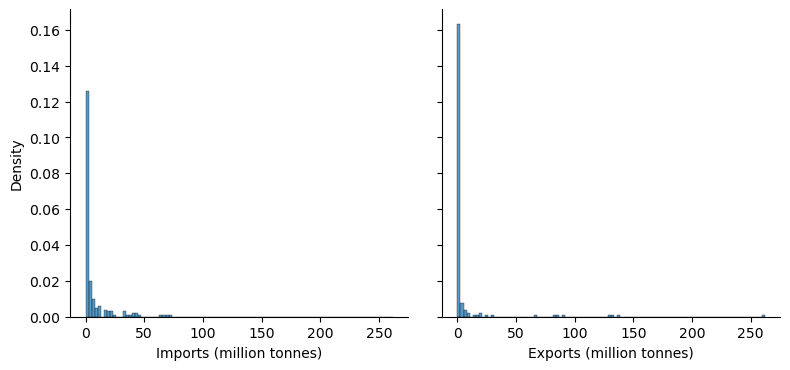

In [77]:
g = sns.displot(
    trade[trade['variable']!='flows'], x="value", col="variable", bins=100, stat='density', height=4, 
    col_order=['imports', 'exports'], facet_kws={'sharex': False}
)
g.set_titles(col_template="")
g.axes[0,0].set_xlabel('Imports (million tonnes)')
g.axes[0,1].set_xlabel('Exports (million tonnes)')
# g.axes[0,2].set_xlabel('Total Flows (million tonnes)')
plt.subplots_adjust(wspace = 0.1)
plt.show()